A partir de una distribución normal se extraen muestras aleatorias de tamaño $4$. Como estimadores del parámetro $\mu$ se usan:

$\mu_1 = \frac{x_1 + 2x_2 + 3x_3}{6}$

$\mu_2 = \frac{4x_2 - x_3}{3}$

$\mu_1 = \hat{x}$

a) Comprobar si son insesgados.

b) Cuál es el más eficiente?

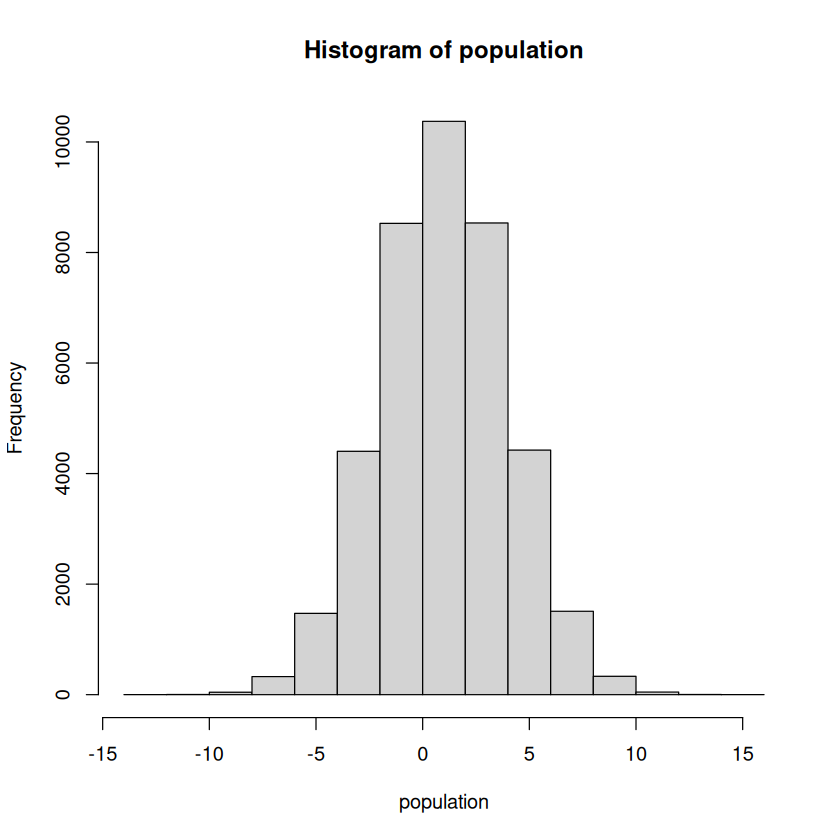

In [9]:
proposed_mean <- 1
proposed_sd <- 3

population <- rnorm(n = 40000, mean = proposed_mean, sd = proposed_sd)
hist(population)

In [10]:
number_observations <- 200
sample_size <- 4
samples <- list()
for (i in 1:number_observations) {
  samples[[i]] <- sample(population, sample_size)
}

get_sesgo <- function(actual_value, estimator, sampleS)
{
    sesgo <-  mean(sapply(sampleS, estimator)) - actual_value 
    return(sesgo)
}

get_variance <- function(estimator, sampleS)
{
    mean_estimator <- mean(sapply(sampleS, estimator))
    variance <- mean(
        sapply(
            sapply(sampleS, estimator),
            function(x) (x - mean_estimator)^2
        )
    )
    
    return(variance)
}

get_mse <- function(actual_value, estimator, samples) {
    return(get_sesgo(
        actual_value,
        estimator,
        samples
    )^2 + get_variance(estimator, samples))
}

estimators <- c(
    function(sample) (sample[1] + 2 * sample[2] + 3 * sample[3]) / 6,
    function(sample) (4 * sample[1] - sample[3]) / 3,
    function(sample) mean(sample)
)

In [11]:
get_estimate_sample <- function(estimator, samples, true_value) {
    estimated_values <- sapply(samples, estimator)
    # Create plot
    plott <- plot(
        estimated_values,
        type = "b", 
        main = "Estimated Values for Each Sample", 
        xlab = "Sample",
        ylab = "Estimated Value"
    ) + abline(h = true_value, col = "red", lwd = 2)
    return (plott)
}

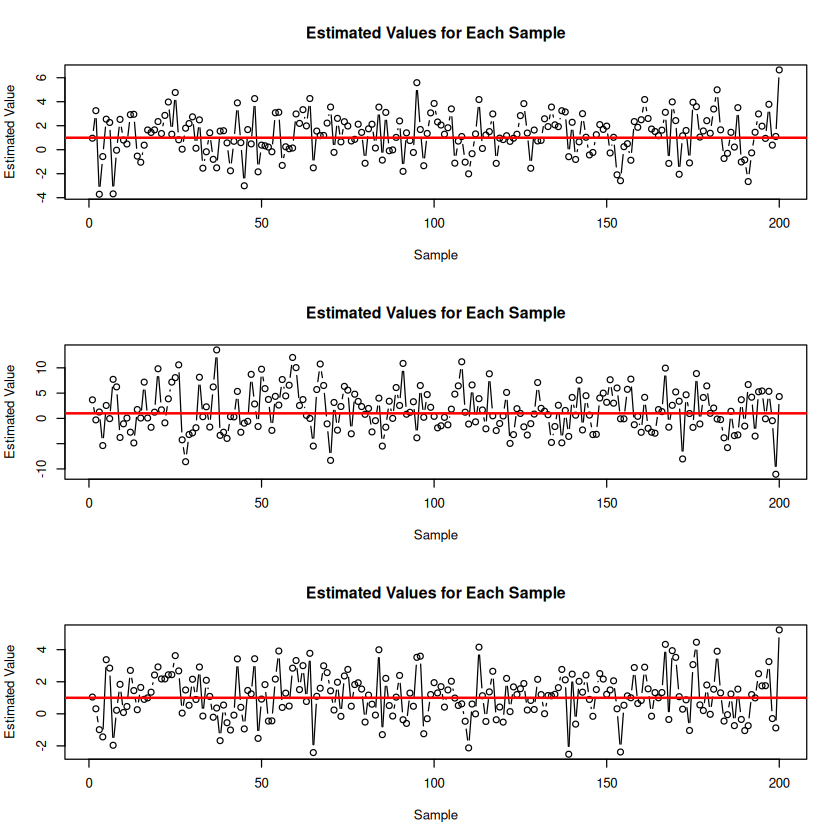

In [12]:
par(mfrow = c(3, 1))
for (i in 1:3) {
   get_estimate_sample(estimators[[i]], samples, proposed_mean)
}

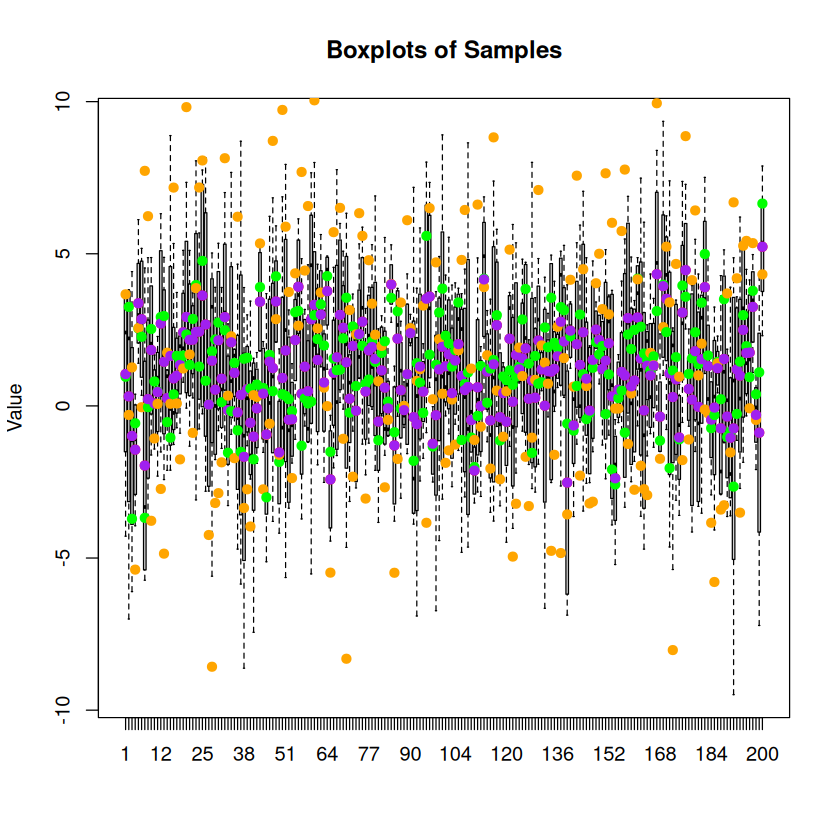

In [13]:
boxplot(samples, main = "Boxplots of Samples", ylab = "Value", outline = FALSE)
for (i in 1:length(samples)) {
  points(i, mean(samples[[i]]), col = "red", pch = 19)
}

colors <- c("green", "orange", "purple")
for (i in 1:length(samples)) {
  bp_stats <- boxplot.stats(samples[[i]])
  points(rep(i, length(bp_stats$out)), bp_stats$out, col = "blue", pch = 19)
  for (j in 1:3)
  {
    points(i, estimators[[j]](samples[[i]]), col = colors[j], pch = 19)
  }
}
# pending add legend to the dots.

In [14]:
# finally I have to plot the MSE of each estimate to compare them.
# In this problem sample-size is fixed, so to me only is needed three values.

for (i in 1:3)
{
    print(get_mse(proposed_mean, estimators[[i]], samples))
}

[1] 3.147311
[1] 19.08703
[1] 2.109459


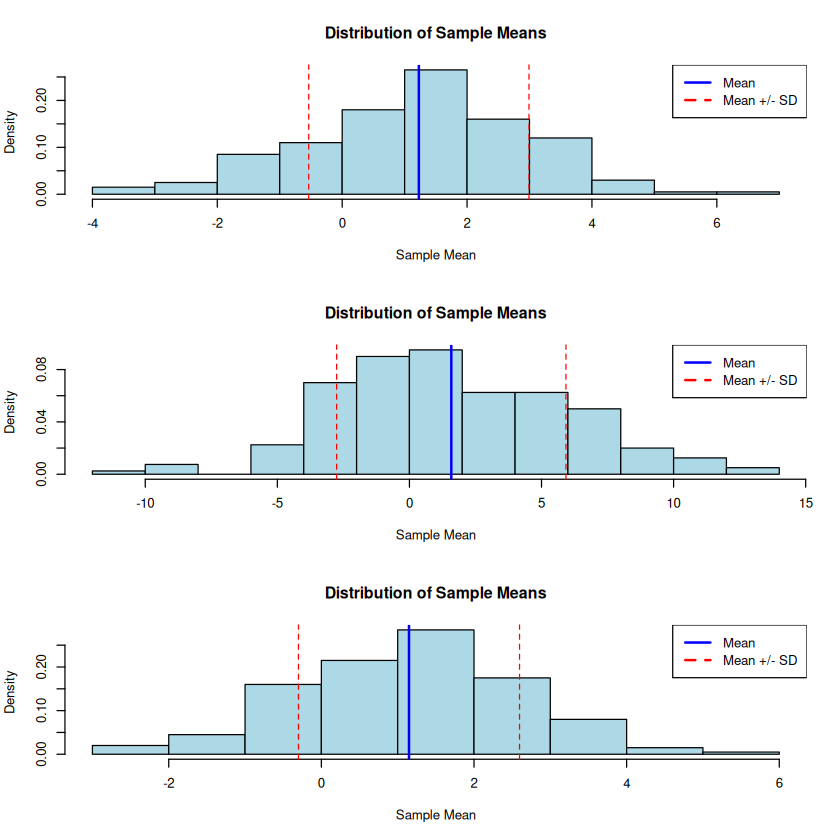

In [17]:
par(mfrow = c(3, 1))
for (i in 1:3)
{
    sample_means <- sapply(samples, estimators[[i]])

    # Calculate the mean and standard deviation of the sample means
    mean_sample_means <- mean(sample_means)
    sd_sample_means <- sd(sample_means)

    # Plot the distribution of sample means
    hist(sample_means,
        main = "Distribution of Sample Means",
        xlab = "Sample Mean", col = "lightblue", border = "black", freq = FALSE
    )

    # Add lines for the mean and standard deviation
    abline(
        v = mean_sample_means,
        col = "blue",
        lwd = 2
    ) # Mean
    abline(
        v = mean_sample_means + sd_sample_means,
        col = "red",
        lty = 2
    ) # Mean + SD
    abline(
        v = mean_sample_means - sd_sample_means,
        col = "red",
        lty = 2
    ) # Mean - SD

    # Add a legend
    legend("topright",
        legend = c("Mean", "Mean +/- SD"),
        col = c("blue", "red"), lty = c(1, 2), lwd = c(2, 2)
    )
}
